# Исследование оттока клиентов банка 

### Краткий анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score 
from sklearn.preprocessing import StandardScaler 
pd.options.mode.chained_assignment = None
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# считываем датафрейм
try:
    df=pd.read_csv('C:\\Python\\ЯП\\проект_5\\Churn.csv', sep=',')

except:
    df=pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv', sep=',')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


#### Почистим выбросы

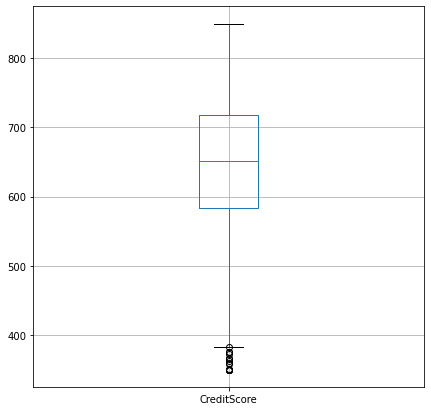

In [4]:
df[['CreditScore']].boxplot(figsize=(7,7));

In [5]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [6]:
df[df['CreditScore'] < 361]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1405,1406,15612494,Panicucci,359,France,Female,44,NaN,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1.0,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0.0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8.0,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4.0,163146.46,1,1,0,169621.69,1
8723,8724,15803202,Onyekachi,350,France,Male,51,10.0,0.00,1,1,1,125823.79,1
8762,8763,15765173,Lin,350,France,Female,60,3.0,0.00,1,0,0,113796.15,1
9624,9625,15668309,Maslow,350,France,Female,40,0.0,111098.85,1,1,1,172321.21,1


In [7]:
df=df.drop(df[df['CreditScore'] < 361].index)

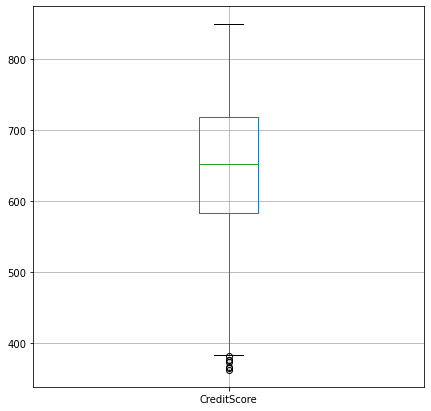

In [8]:
df[['CreditScore']].boxplot(figsize = (7,7));

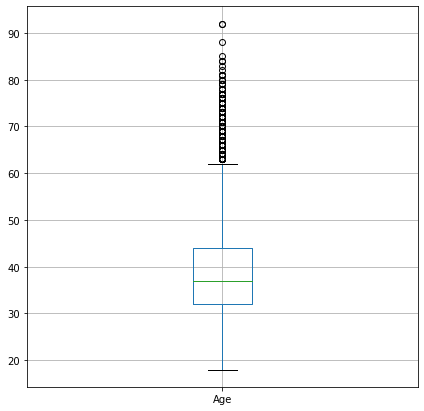

In [9]:
df[['Age']].boxplot(figsize = (7,7));

In [10]:
df=df.drop(df[df['Age'] > 63].index)

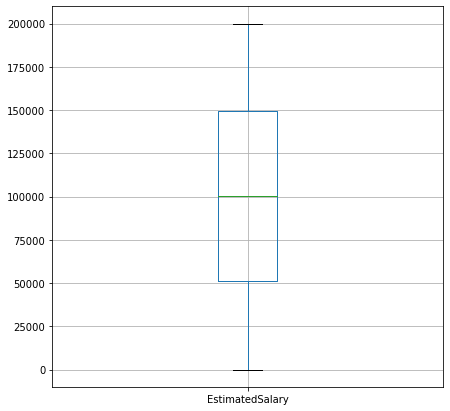

In [11]:
df[['EstimatedSalary']].boxplot(figsize = (7,7));

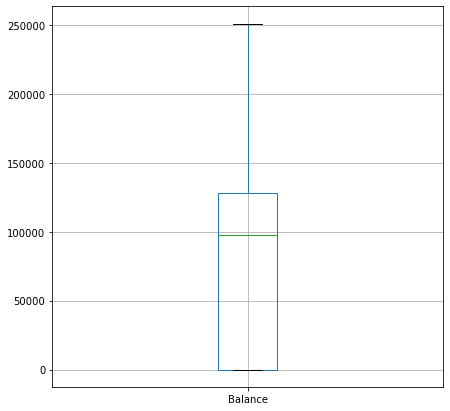

In [12]:
df[['Balance']].boxplot(figsize = (7,7));

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9673 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9673 non-null   int64  
 1   CustomerId       9673 non-null   int64  
 2   Surname          9673 non-null   object 
 3   CreditScore      9673 non-null   int64  
 4   Geography        9673 non-null   object 
 5   Gender           9673 non-null   object 
 6   Age              9673 non-null   int64  
 7   Tenure           8784 non-null   float64
 8   Balance          9673 non-null   float64
 9   NumOfProducts    9673 non-null   int64  
 10  HasCrCard        9673 non-null   int64  
 11  IsActiveMember   9673 non-null   int64  
 12  EstimatedSalary  9673 non-null   float64
 13  Exited           9673 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [14]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             889
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

<AxesSubplot:>

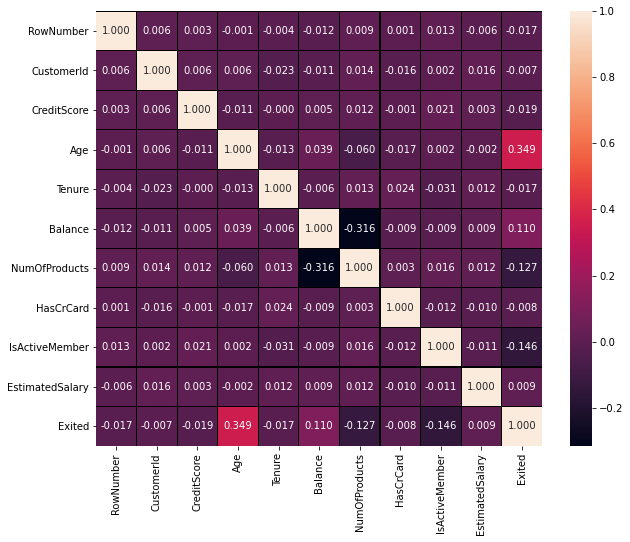

In [15]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(method = 'spearman'), annot = True, fmt = '.3f', linecolor = 'black', linewidths = 0.1)

У нас прослеживается слабая корреляция столбцов:
   - Exited и Age
   - NumOfProducts и Balance

Пропуски в столбце Tenure - сколько лет человек является клиентом банка.
Удалим их:

In [16]:
df=df.drop(df[df['Tenure'].isnull()==True].index)

In [17]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 Проверили - пропусков нет

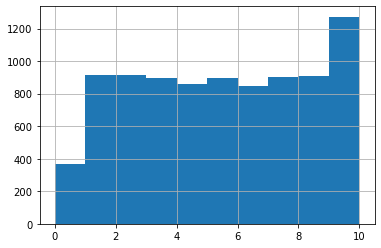

In [18]:
df['Tenure'].hist();

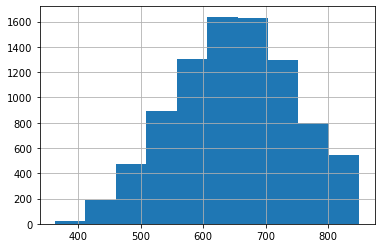

In [19]:
df['CreditScore'].hist();

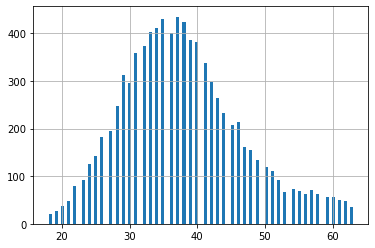

In [20]:
df['Age'].hist(bins=100);

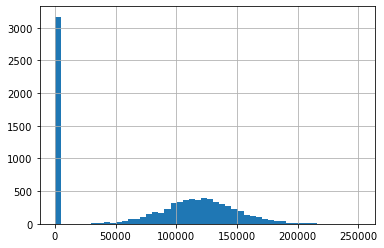

In [21]:
df['Balance'].hist(bins=50);

очень много людей с нулевым балансом на счете

Выводы: 
   - переведем колонки Geography(всего 3 страны), Gender в бинарный вид. 

   - Признаки CreditScore и Age и Balance и EstimatedSalary и Tenure отнормируем. 

   - RowNumber, CustomerId, Surnamе - уберем из модели (они не очень информативны)

### Разбиваем наши данные на тестовую, валидационную и тренировочную

In [22]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


In [23]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [24]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


Переведем часть наших данных в бинарный вид

In [25]:
df = pd.get_dummies(df, drop_first = True)

In [26]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


Разделим наши данные на тестовую, тренировочную и валидационную выборки

In [27]:
target = df['Exited']
features = df.drop('Exited', axis=1)

Отделяем от нашего датасета 20% тестовой выборки

In [28]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345)

In [29]:
features_test.shape

(1757, 11)

In [30]:
features_valid.shape

(7027, 11)

Оставшийся большой кусок разделяем на тренировочную и валидационную выборки

In [31]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_valid, target_valid, test_size=0.25, random_state=12345)

In [32]:
features_train.shape

(5270, 11)

In [33]:
features_valid.shape

(1757, 11)

Отнормируем колонки 'CreditScore', 'Age', 'Tenure','Balance','EstimatedSalary'

In [34]:
numeric = ['CreditScore', 'Age', 'Tenure','Balance','EstimatedSalary']

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(features_train[numeric]) 

StandardScaler()

In [37]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric]) 

Посмотрим на баланс наших выборок

In [38]:
target_train.value_counts()

0    4194
1    1076
Name: Exited, dtype: int64

разница примерно в 3-4 раза

### Обучение модели на несбалансированных данных

In [39]:
scores_data=pd.DataFrame()
best_model = None
best_result = 0
for est in range(1, 16):
     for depth in range (1, 16):
            model = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth=depth) 
            # обучите модель с заданным количеством деревьев
    
            model.fit(features_train, target_train) # обучите модель на тренировочной выборке
            predictions_valid = model.predict(features_valid)
            result=f1_score(target_valid, predictions_valid)
            if result > best_result:
                print("n_estimators =", est, ": ", end='')
                print("max_depth =", depth, ": ", end='')
                print(f1_score(target_valid, predictions_valid))
                best_model =model # сохраните наилучшую модель
                best_result =result #  сохраните наилучшее значение метрики на валидационных данных
                
                temp_score_data=pd.DataFrame({'est':[est],
                                  'depth':[depth],
                                  'score':[result]})
    
                scores_data=scores_data.append(temp_score_data)
                
print("f1_score наилучшей модели на валидационной выборке:", best_result)

n_estimators = 1 : max_depth = 1 : 0.17632241813602015
n_estimators = 1 : max_depth = 4 : 0.5008635578583766
n_estimators = 3 : max_depth = 8 : 0.5009208103130754
n_estimators = 4 : max_depth = 10 : 0.5064220183486239
n_estimators = 5 : max_depth = 12 : 0.5144804088586031
n_estimators = 7 : max_depth = 12 : 0.5163511187607573
n_estimators = 8 : max_depth = 12 : 0.5202108963093146
n_estimators = 9 : max_depth = 12 : 0.5305410122164048
f1_score наилучшей модели на валидационной выборке: 0.5305410122164048


In [40]:
scores_data

,est,depth,score
0,1,1,0.176322
0,1,4,0.500864
0,3,8,0.500921
0,4,10,0.506422
0,5,12,0.514480
0,7,12,0.516351
0,8,12,0.520211
0,9,12,0.530541


In [41]:
predictions_test = model.predict(features_test)
result=f1_score(target_test, predictions_test)
result

0.5953947368421053

Выводы: Наилучший показатель F1-метрики на валидационной выборке = 0.55, а на тестовой = 0.53. Что недостаточно по условию задачи (не менее 0.59)

### Устраним дисбаланс классов

Сделаем наши выборки более равновесными, увеличив "отстающую"

In [42]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [43]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [44]:
features_upsampled.shape

(8498, 11)

In [45]:
target_upsampled.shape

(8498,)

In [46]:
target_upsampled.value_counts()

1    4304
0    4194
Name: Exited, dtype: int64

Вывод: Выравнили баланс 0 и 1

### Построим и обучим модели логистической регресси и случайного леса

#### Модель логистической регрессии

In [47]:
model_l=LogisticRegression(solver='liblinear', random_state=12345,class_weight='balanced')
model_l.fit(features_upsampled,target_upsampled)
predicted_valid=model_l.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.46817248459958927


Проверим модель на тестовой выборке

In [48]:
predictions_test = model_l.predict(features_test)
result=f1_score(target_test, predictions_test)
result

0.5182266009852217

Не самые выдающиеся результаты. Построим модель случайного леса.

#### Модель случайного леса

In [49]:
scores_data=pd.DataFrame()
best_model = None
best_result = 0
for est in range(1, 20):
     for depth in range (1, 20):
            model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth=depth,class_weight='balanced') 
            # обучите модель с заданным количеством деревьев
    
            model_rfc.fit(features_upsampled, target_upsampled) # обучим модель на тренировочной выборке
            predictions_valid = model_rfc.predict(features_valid)
            result=f1_score(target_valid, predictions_valid)
            if result > best_result:
                print("n_estimators =", est, ": ", end='')
                print("max_depth =", depth, ": ", end='')
                print(f1_score(target_valid, predictions_valid))
                best_model =model_rfc # сохраним наилучшую модель
                best_result =result #  сохраним наилучшее значение метрики на валидационных данных
                
                temp_score_data=pd.DataFrame({'est':[est],
                                  'depth':[depth],
                                  'score':[result]})
    
                scores_data=scores_data.append(temp_score_data)
                
print("f1_score наилучшей модели на валидационной выборке:", best_result)

n_estimators = 1 : max_depth = 1 : 0.17632241813602015
n_estimators = 1 : max_depth = 2 : 0.3781094527363184
n_estimators = 1 : max_depth = 3 : 0.453765490943756
n_estimators = 1 : max_depth = 4 : 0.501108647450111
n_estimators = 1 : max_depth = 7 : 0.5117370892018779
n_estimators = 1 : max_depth = 8 : 0.5267489711934157
n_estimators = 1 : max_depth = 9 : 0.5424912689173457
n_estimators = 4 : max_depth = 7 : 0.5483870967741935
n_estimators = 6 : max_depth = 6 : 0.5515587529976019
n_estimators = 7 : max_depth = 7 : 0.5531914893617021
n_estimators = 7 : max_depth = 12 : 0.5572413793103449
n_estimators = 9 : max_depth = 7 : 0.5592417061611376
n_estimators = 11 : max_depth = 6 : 0.5655339805825242
f1_score наилучшей модели на валидационной выборке: 0.5655339805825242


Проверим модель на тестовой выборке

In [50]:
predictions_test = model_rfc.predict(features_test)
result=f1_score(target_test, predictions_test)
result

0.6104651162790697

#### Использование случайного леса совместно с GridSearchCV

т.к. валидационная выборка тут не нужна, то мы можем увеличить за счет нее объем наших обучающих данных

In [51]:
target = df['Exited']
features = df.drop('Exited', axis=1)

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345)
features_train.shape

(7027, 11)

In [52]:
features_test.shape

(1757, 11)

снова отнормируем данные 

In [53]:
numeric = ['CreditScore', 'Age', 'Tenure','Balance','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric]) 


и сбалансируем

In [54]:
target_train.value_counts()

0    5597
1    1430
Name: Exited, dtype: int64

In [55]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [56]:
target_upsampled.value_counts()

1    5720
0    5597
Name: Exited, dtype: int64

Обучим нашу модель

In [57]:
clf_rf_cv=RandomForestClassifier(random_state=12345,class_weight='balanced')
parametrs={
    'n_estimators':range(5,30),
    'max_depth':range(3,10),
}
gr=GridSearchCV(clf_rf_cv,parametrs, cv=5)
gr.fit(features_upsampled, target_upsampled)

predictions_test = gr.predict(features_test)
result=f1_score(target_test, predictions_test)

print(gr.best_params_)
print(result)

{'max_depth': 9, 'n_estimators': 23}
0.6226415094339622


Почему то при использовании GridSearchCV результат не получается лучше....

#### Обучим случайный лес на более полной выборке и проверим на тестовой

In [58]:
model_rfc_2 = RandomForestClassifier(random_state=12345, n_estimators=13,max_depth=9,class_weight='balanced') 
model_rfc_2.fit(features_upsampled, target_upsampled) # обучим модель на тренировочной выборке
predictions_test_2 = model_rfc_2.predict(features_test)
result_2=f1_score(target_test, predictions_test_2)    
print("f1_score наилучшей модели на тестовой выборке:", result_2)

f1_score наилучшей модели на тестовой выборке: 0.613931523022432


#### Посмотрим метрики:

In [59]:
confusion_matrix(target_test, predictions_test)

array([[1173,  218],
       [ 102,  264]], dtype=int64)

In [60]:
recall_score(target_test,predictions_test)

0.7213114754098361

In [61]:
precision_score(target_test,predictions_test)

0.5477178423236515

Построим ROC - кривую

Text(0.5, 1.0, 'ROC-кривая')

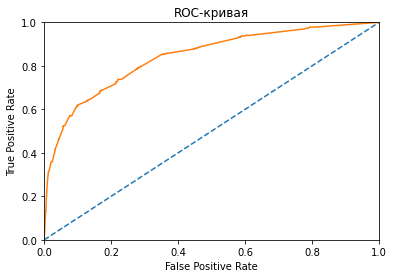

In [62]:
probabilities_test = model_rfc.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')


Посмотрим метрику roc_auc

In [63]:
probabilities_test = model_rfc.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(roc_auc_score(target_test, probabilities_one_test))


0.840666776663406


Для проверки адекватности модели мы использовали DummyClassifier. 

In [64]:
dummy = DummyClassifier(strategy='most_frequent').fit(features_upsampled, target_upsampled)
dummy_pred = dummy.predict(features_test)
f1_score(target_test, dummy_pred)

0.3447951012717852

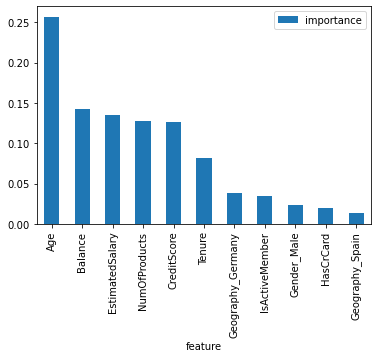

In [65]:
importances = pd.DataFrame({'feature':features_upsampled.columns,'importance':np.round(model_rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar();

Наиболее ценной метрикой оказался возраст. Когда удаляем выбросы(возраст выше 63 лет), качество модели ростет.

# Выводы:
  - Мы провели краткий анализ исходных данных и подготовили их к дальнейшей обработке
  - Оценили баланс классов
  - Построили модель машинного обучения на модели с дисбалансом
  - Устронили дисбаланс классов
  - Построенная модель машинного обучения (случайный лес) по f1-метрики превышает 0.59
  - метрики precision получились в районе 0.54 и recall получились в районе 0.72
  - метрика roc_auc = 0.84
  - наиболее ценной метрикой оказался возраст